### Final Dataset Development (Market Data OHLCV + TA + Textual Data + Macroeconomics Data)

#### Train and Test Splits

**OHLCV Data:**

- From `Enfoque` and `Nelogica` (2017/04 - 2022/07)
  - 1-min time-bars
    - Resampled to Daily and Hourly data


**Technical Indicators:**

- From `ta_lib`
  - SMAs
  - EMAs
  - RSI
  - ADX
  - MACD
  - BBANDS
  - OBV

**Textual Data:**

- From `Suno Research`
  - Sentiments - Resample Daily - #News x News Count (Shift 1 Day - Avoid Lookahead Bias)
- From `Twitter`
  - Sentiments - Resample Daily - #Tweets x RTs + Favorite Counts (Shift 1 Day - Avoid lookahead bias)

**Macroeconomics Data:**

- From `Banco Central`
  - Selic
  - IPCA

In [2]:
import pandas as pd

In [59]:
ticker: str = 'PETR4'

### Macroeconomics Data - Selic

In [60]:
selic = pd.read_csv('./macro/selic.csv', sep=';')
selic.rename(columns={'value': 'selic'}, inplace=True)
selic['selic'] = selic['selic'] * 100 * 252

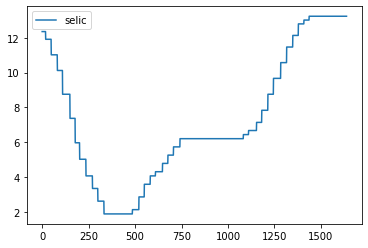

In [61]:
selic.plot();

### Macroeconomics Data - IPCA

In [4]:
ipca = pd.read_csv('./macro/ipca_daily.csv', sep=';')
ipca.rename(columns={'value': 'ipca'}, inplace=True)

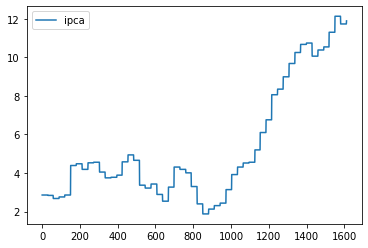

In [5]:
ipca.plot();

### Textual Data - News

In [62]:
df_text_news = pd.read_csv(f'./textual/news/suno_daily_sent_scores_{ticker.lower()}.csv')
df_text_news.rename(columns={'sent_score': 'sent_score_news'}, inplace=True)
df_text_news

,date,sent_score_news
0,2020-07-17,1.277005
1,2020-07-18,-0.315610
2,2020-07-19,-0.315610
3,2020-07-20,-0.315610
4,2020-07-21,-0.315610
...,...,...
650,2022-04-28,6.054849
651,2022-04-29,-0.315610
652,2022-04-30,-0.315610
653,2022-05-01,-0.315610


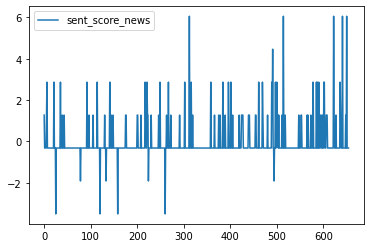

In [63]:
df_text_news.plot();

### Textual Data - Twitter

In [64]:
try:
    df_text_twitter = pd.read_csv(f'./textual/twitter/twitter_daily_sent_scores_{ticker.upper()}.csv')
    df_text_twitter.rename(columns={'sent_score': 'sent_score_twitter'}, inplace=True)
except:
    # Case when no Twitter Data is Available
    df_text_twitter = df_text_news.copy()
    df_text_twitter.rename(columns={'sent_score_news': 'sent_score_twitter'}, inplace=True)
    df_text_twitter['sent_score_twitter'] = 0

<AxesSubplot:>

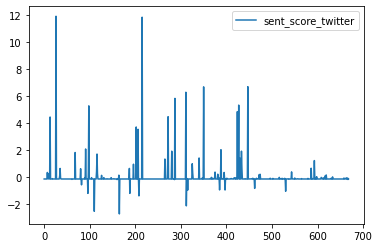

In [65]:
df_text_twitter.plot()

### Market Data and Technical Indicators

#### Train Split

In [66]:
df_market_ta = pd.read_csv(f'./market/ohlcv_daily_TA/train/{ticker.upper()}_train.csv')
df_market_ta

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ma_10,ma_20,ema_5,ema_10,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume
0,2018-02-06,11.951458,12.548713,11.900627,12.548713,53949700.0,12.485175,12.688496,12.294562,12.383515,...,12.475644,11.844079,12.560549,12.384857,11.932570,-0.043689,-0.011078,-0.032566,0.013252,0.165198
1,2018-02-07,12.688496,12.847340,12.300916,12.377161,50879500.0,11.951458,12.548713,11.900627,12.548713,...,12.562691,11.920006,12.499420,12.383457,11.974912,0.059843,0.023519,0.033083,-0.013765,-0.171552
2,2018-02-08,12.421637,12.542359,11.945104,12.167486,42830500.0,12.688496,12.847340,12.300916,12.377161,...,12.548713,11.992440,12.388775,12.344190,11.993252,-0.021256,-0.024025,-0.029352,-0.017086,-0.209675
3,2018-02-09,12.091241,12.319977,11.760844,11.887920,55015300.0,12.421637,12.542359,11.945104,12.167486,...,12.470561,12.041046,12.221824,12.261232,11.983221,-0.026959,-0.017890,-0.015546,-0.023245,-0.279566
4,2018-02-14,12.078533,12.300916,12.046764,12.218316,33844000.0,12.091241,12.319977,11.760844,11.887920,...,12.436886,12.104584,12.220654,12.253429,12.005611,-0.001052,-0.001548,0.024020,0.027413,0.330396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2021-12-23,23.385424,23.459716,23.236840,23.377169,23823300.0,23.443206,23.443206,23.088256,23.278113,...,23.846859,23.434296,23.479102,23.560525,23.171790,-0.002468,0.000704,0.006415,0.004246,0.099056
961,2021-12-27,23.377169,23.732119,23.236840,23.699100,25527000.0,23.385424,23.459716,23.236840,23.377169,...,23.771741,23.567648,23.552435,23.585720,23.222010,-0.000353,0.011545,0.000000,0.013677,0.321931
962,2021-12-28,23.946740,24.169615,23.690846,23.789902,23392300.0,23.377169,23.732119,23.236840,23.699100,...,23.709006,23.656999,23.631591,23.622844,23.276095,0.024072,0.018267,0.019350,0.003824,0.090801
963,2021-12-29,23.690846,23.855939,23.484480,23.484480,28498100.0,23.946740,24.169615,23.690846,23.789902,...,23.654525,23.744788,23.582554,23.597687,23.295941,-0.010743,-0.013063,-0.008749,-0.012921,-0.305422


In [67]:
# [Textual Data]
# News
df_concat = pd.merge(df_market_ta, df_text_news, how='left', on='date').fillna(0)
# Twitter
df_concat = pd.merge(df_concat, df_text_twitter, how='left', on='date').fillna(0)

# [Macroeconomics Data]
# Selic
df_concat = pd.merge(df_concat, selic, how='inner', on='date')
df_concat

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ema_10,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume,sent_score_news,sent_score_twitter,selic
0,2018-02-06,11.951458,12.548713,11.900627,12.548713,53949700.0,12.485175,12.688496,12.294562,12.383515,...,12.384857,11.932570,-0.043689,-0.011078,-0.032566,0.013252,0.165198,0.00000,0.000000,6.673212
1,2018-02-07,12.688496,12.847340,12.300916,12.377161,50879500.0,11.951458,12.548713,11.900627,12.548713,...,12.383457,11.974912,0.059843,0.023519,0.033083,-0.013765,-0.171552,0.00000,0.000000,6.673212
2,2018-02-08,12.421637,12.542359,11.945104,12.167486,42830500.0,12.688496,12.847340,12.300916,12.377161,...,12.344190,11.993252,-0.021256,-0.024025,-0.029352,-0.017086,-0.209675,0.00000,0.000000,6.439104
3,2018-02-09,12.091241,12.319977,11.760844,11.887920,55015300.0,12.421637,12.542359,11.945104,12.167486,...,12.261232,11.983221,-0.026959,-0.017890,-0.015546,-0.023245,-0.279566,0.00000,0.000000,6.439104
4,2018-02-14,12.078533,12.300916,12.046764,12.218316,33844000.0,12.091241,12.319977,11.760844,11.887920,...,12.253429,12.005611,-0.001052,-0.001548,0.024020,0.027413,0.330396,0.00000,0.000000,6.439104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2021-12-23,23.385424,23.459716,23.236840,23.377169,23823300.0,23.443206,23.443206,23.088256,23.278113,...,23.560525,23.171790,-0.002468,0.000704,0.006415,0.004246,0.099056,-0.31561,-0.177781,8.756748
961,2021-12-27,23.377169,23.732119,23.236840,23.699100,25527000.0,23.385424,23.459716,23.236840,23.377169,...,23.585720,23.222010,-0.000353,0.011545,0.000000,0.013677,0.321931,-0.31561,-0.156440,8.756748
962,2021-12-28,23.946740,24.169615,23.690846,23.789902,23392300.0,23.377169,23.732119,23.236840,23.699100,...,23.622844,23.276095,0.024072,0.018267,0.019350,0.003824,0.090801,-0.31561,-0.156440,8.756748
963,2021-12-29,23.690846,23.855939,23.484480,23.484480,28498100.0,23.946740,24.169615,23.690846,23.789902,...,23.597687,23.295941,-0.010743,-0.013063,-0.008749,-0.012921,-0.305422,-0.31561,0.369981,8.756748


In [68]:
df_concat.to_csv(f'./contextual_data_market_and_text/daily/train/{ticker.upper()}_train.csv', index=False)

#### Test Split

In [69]:
df_market_ta_test = pd.read_csv(f'./market/ohlcv_daily_TA/test/{ticker.upper()}_test.csv')
df_market_ta_test.head()

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ma_10,ma_20,ema_5,ema_10,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume
0,2022-01-03,23.558771,24.120088,23.550517,24.054050,44272300.0,23.567026,23.690846,23.434952,23.534007,...,23.578583,23.856764,23.728931,23.671189,23.388656,-0.000350,0.017956,0.004919,0.021857,0.520043
1,2022-01-04,24.070560,24.268671,23.864193,24.177870,44865800.0,23.558771,24.120088,23.550517,24.054050,...,23.588488,23.886068,23.878577,23.763313,23.463819,0.021491,0.006141,0.013231,0.005134,0.123820
2,2022-01-05,24.095324,24.161361,23.245095,23.253349,60604300.0,24.070560,24.268671,23.864193,24.177870,...,23.597568,23.854701,23.670168,23.670592,23.443774,0.001028,-0.004432,-0.026285,-0.038989,-0.924521
3,2022-01-06,23.352405,23.649573,22.980946,23.005710,51975800.0,24.095324,24.161361,23.245095,23.253349,...,23.565375,23.794442,23.448682,23.549705,23.402054,-0.031318,-0.021410,-0.011429,-0.010707,-0.247640
4,2022-01-07,23.203821,23.352405,22.964437,23.236840,37835300.0,23.352405,23.649573,22.980946,23.005710,...,23.561248,23.738723,23.378068,23.492820,23.386319,-0.006383,-0.012645,-0.000719,0.009997,0.231130


In [70]:
# [Textual Data]
# News
df_concat_test = pd.merge(df_market_ta_test, df_text_news, how='left', on='date').fillna(0)
# Twitter
df_concat_test = pd.merge(df_concat_test, df_text_twitter, how='left', on='date').fillna(0)

# [Macroeconomics Data]
# Selic
df_concat_test = pd.merge(df_concat_test, selic, how='inner', on='date')
df_concat_test

,date,open,high,low,close,volume,prev_open,prev_high,prev_low,prev_close,...,ema_10,ema_20,lr_open,lr_high,lr_low,lr_close,r_volume,sent_score_news,sent_score_twitter,selic
0,2022-01-03,23.558771,24.120088,23.550517,24.054050,44272300.0,23.567026,23.690846,23.434952,23.534007,...,23.671189,23.388656,-0.000350,0.017956,0.004919,0.021857,0.520043,-0.31561,-0.156440,8.756748
1,2022-01-04,24.070560,24.268671,23.864193,24.177870,44865800.0,23.558771,24.120088,23.550517,24.054050,...,23.763313,23.463819,0.021491,0.006141,0.013231,0.005134,0.123820,-0.31561,-0.156440,8.756748
2,2022-01-05,24.095324,24.161361,23.245095,23.253349,60604300.0,24.070560,24.268671,23.864193,24.177870,...,23.670592,23.443774,0.001028,-0.004432,-0.026285,-0.038989,-0.924521,-0.31561,-0.085302,8.756748
3,2022-01-06,23.352405,23.649573,22.980946,23.005710,51975800.0,24.095324,24.161361,23.245095,23.253349,...,23.549705,23.402054,-0.031318,-0.021410,-0.011429,-0.010707,-0.247640,-0.31561,-0.156440,8.756748
4,2022-01-07,23.203821,23.352405,22.964437,23.236840,37835300.0,23.352405,23.649573,22.980946,23.005710,...,23.492820,23.386319,-0.006383,-0.012645,-0.000719,0.009997,0.231130,-0.31561,-0.156440,8.756748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2022-07-07,28.000000,28.920000,28.000000,28.470000,47725100.0,28.160000,28.480000,26.910000,27.710000,...,28.160641,28.371901,-0.005698,0.015331,0.039707,0.027058,0.760000,0.00000,0.000000,12.357324
129,2022-07-08,28.530000,28.970000,28.370000,28.790000,39272000.0,28.000000,28.920000,28.000000,28.470000,...,28.275070,28.411720,0.018752,0.001727,0.013128,0.011177,0.320000,0.00000,0.000000,12.357324
130,2022-07-11,28.320000,28.790000,28.250000,28.580000,36701900.0,28.530000,28.970000,28.370000,28.790000,...,28.330512,28.427747,-0.007388,-0.006233,-0.004239,-0.007321,-0.210000,0.00000,0.000000,12.357324
131,2022-07-12,28.300000,28.430000,27.970000,28.230000,43095600.0,28.320000,28.790000,28.250000,28.580000,...,28.312237,28.408914,-0.000706,-0.012583,-0.009961,-0.012322,-0.350000,0.00000,0.000000,12.357324


In [71]:
df_concat_test.to_csv(f'./contextual_data_market_and_text/daily/test/{ticker.upper()}_test.csv', index=False)